In [1]:
# Handling
import sys
import os
import pandas as pd
import threading
import time

# System 
import tkinter as tk
from tkinter import filedialog, messagebox, ttk, StringVar

# Visualize
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter

# Moduel
from Algorithms_system import *

In [2]:
def plot_optimal_path(ax,paths,color,label):
    """주어진 경로를 지도 위에 플롯합니다."""
    for path in paths:
        xs = path[1]
        ys = path[0]
        
        ax.scatter(xs, ys, c=color, label=label)
    
def plot_departure_destination(ax,xs,ys,color,label):
    ax.scatter(xs, ys, c=color, label=label)
    
def plot_danger_zones(ax, zones, color, label):
    """위험 지역들을 지도 위에 플롯합니다."""
    for zone in zones[1:-2]:
        ax.scatter(zone['longitude'], zone['latitude'], c=color, label=label)
        
def visualize_best_route(data,optimal_path,throw_jason):
    # figure,ax 생성
    fig,ax = plt.subplots(figsize=(8,6))
    
    # 서울시 시각화
    ax.scatter(data['LON'], data['LAT'], c='blue', label='위치', alpha=0.8)
    
    # 최적 경로 시각화
    # 경로의 시작과 끝에 대한 색상과 레이블 설정
    
    start_label = "시작 위치"
    end_label = "종료 위치"
    mid_label = "경유 위치"
        
    # # 첫번 째 값과 마지막 값은 다른 색으로 표시
    plot_departure_destination(ax, optimal_path[0][1],optimal_path[0][0], 'red', start_label)
    plot_optimal_path(ax, optimal_path[1:-1],'green', mid_label)
    plot_departure_destination(ax, optimal_path[-1][1],optimal_path[-1][0], 'orange', end_label)
    
     # 위험도 지역 시각화
    plot_danger_zones(ax, throw_jason, 'purple', '위험 지역')
    
    # 레이블과 제목 설정
    ax.set_xlabel('(LON)')
    ax.set_ylabel('(LAT)')
    ax.grid(True)  # 그리드 표시
    
    return fig

In [3]:
def embed_figure():
    """ 피규어 시스템 임베딩 
    """
    # 3.0 서울 시 데이터 로드
    data = pd.read_csv('서울시_점수.csv')

    # 3.1 출발지 / 도착지 요청받음
    departure = departure_entry.get()
    destination = destination_entry.get()
    
    # 3.2 최적의 경로 함수 적용
    optimal_path, throw_jason = find_best_route(departure, destination)
    
    # 3.3 시각화 함수 적용
    fig = visualize_best_route(data, optimal_path, throw_jason)
    
    # 3.4 전역 변수 설정
    global canvas
    
    if canvas:
        canvas.get_tk_widget().destroy()  # 기존 캔버스 제거
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)  # 캔버스를 팩을 사용하여 프레임에 추가


In [4]:
def update_status_and_search():
    """
    로딩 함수 구현
    """
    try:
        # 로딩 상태 업데이트
        status_label.config(text="로딩 중...")
        root.update_idletasks()  # UI 업데이트 강제 실행

        # 기존 검색 함수 호출
        embed_figure()

        # 작업 완료 후 상태 업데이트
        status_label.config(text="작업 완료")
        
    except:
        # 오류 발생 시 메시지 업데이트
        status_label.config(text="작업 실패:")
        print(f"오류 발생: {e}")

시작
목적지 도착
시작
목적지 도착
시작
목적지 도착
시작
목적지 도착
시작
목적지 도착


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\pc021\AppData\Local\Temp\ipykernel_5508\2445846.py", line 11, in update_status_and_search
    embed_figure()
  File "C:\Users\pc021\AppData\Local\Temp\ipykernel_5508\2946108467.py", line 12, in embed_figure
    optimal_path, throw_jason = find_best_route(departure, destination)
  File "C:\Users\pc021\Desktop\성장\공모전\Algorithms_system.py", line 352, in find_best_route
    start_lon, start_lat, start_grid, start_district = find_objective_grid(start_address) # 시작 지점
  File "C:\Users\pc021\Desktop\성장\공모전\Algorithms_system.py", line 141, in find_objective_grid
    closest_lon, closest_lat, closest_grid, closest_district = look_for_nearby_location(target_lon,target_lat)
  File "C:\Users\pc021\Desktop\성장\공모전\Algorithms_system.py", line 114, in look_for_nearby_location
    distance = haversine(target_lon, target_lat, lon, lat)
  File "C:\Users\pc021\Desktop\성장\공모전\Algorithms_system.py", line 178, in haversine
    

시작
목적지 도착


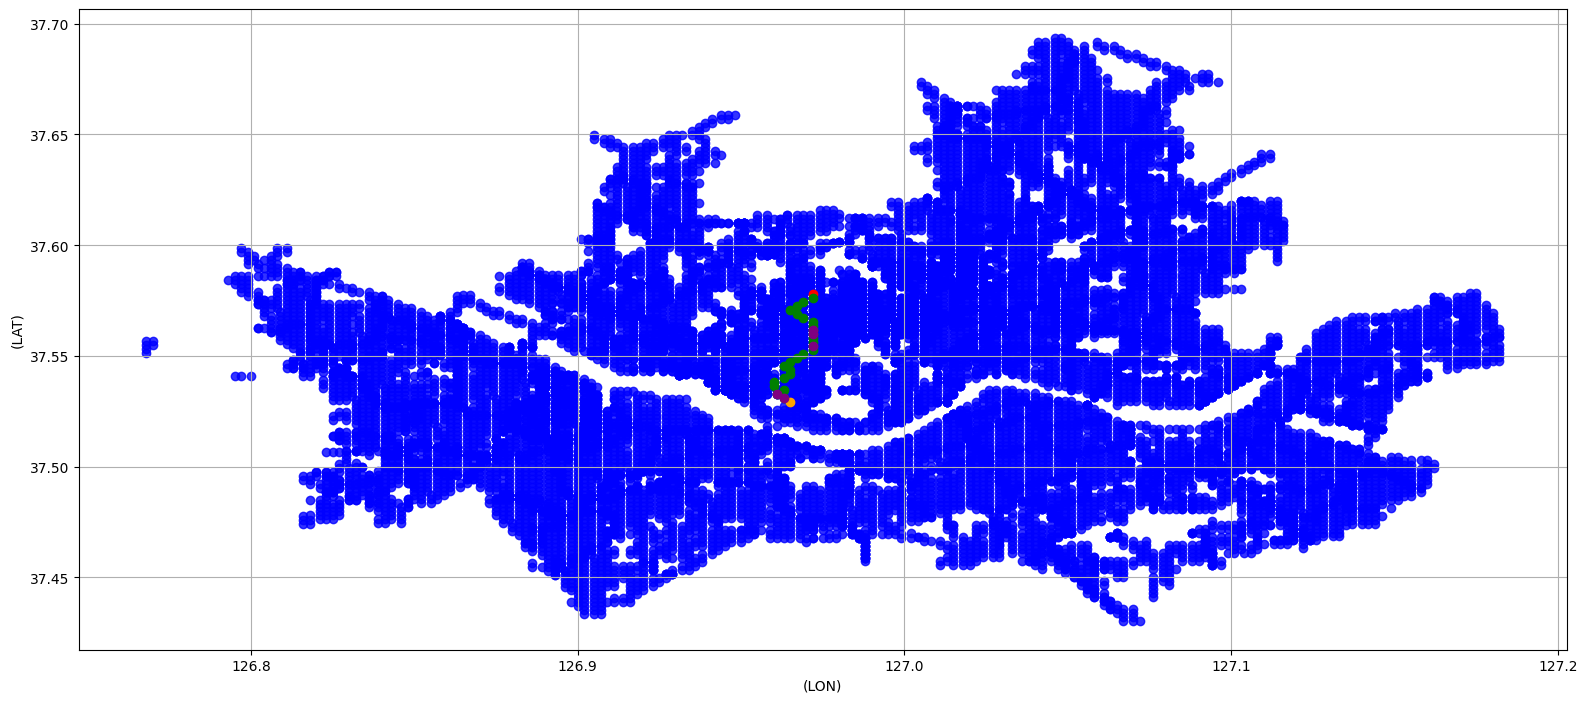

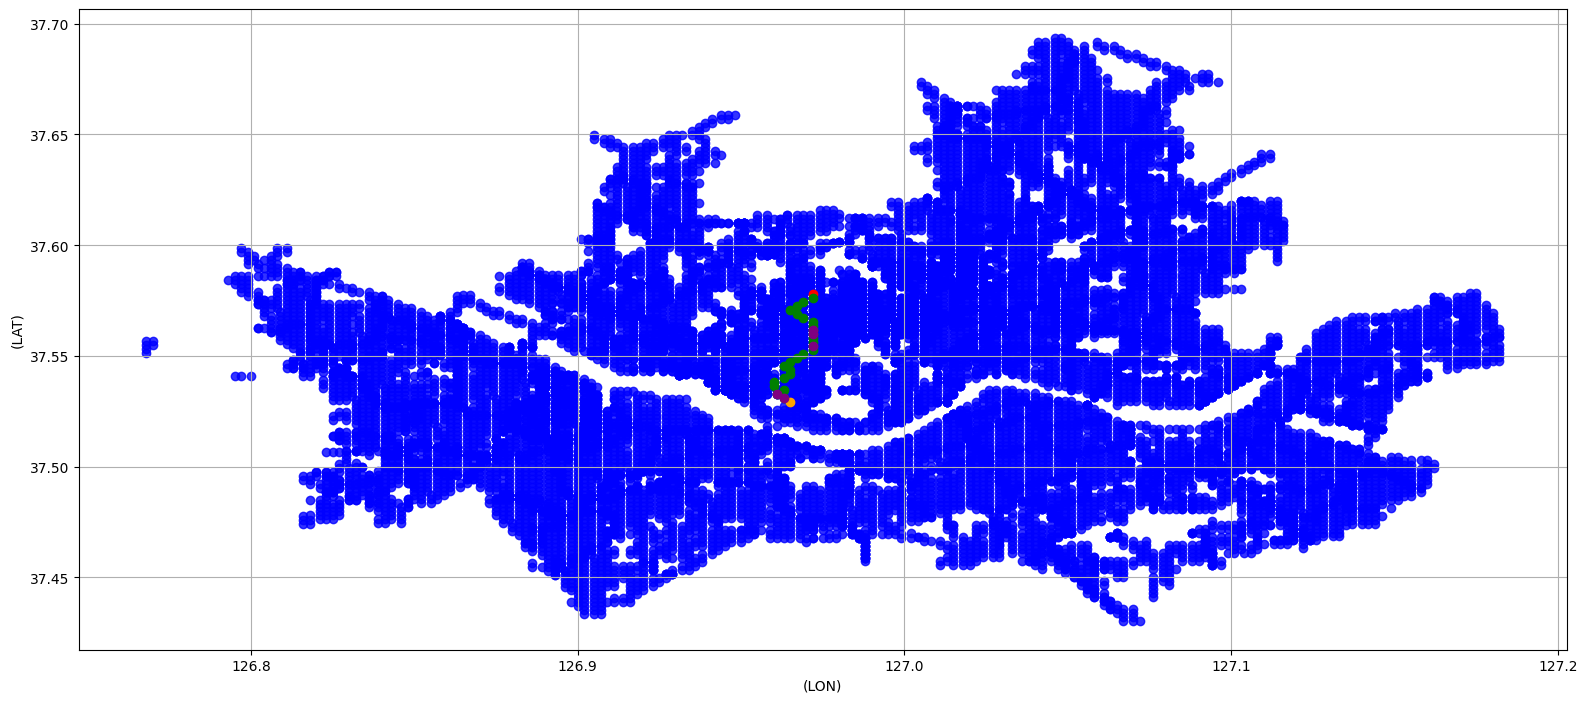

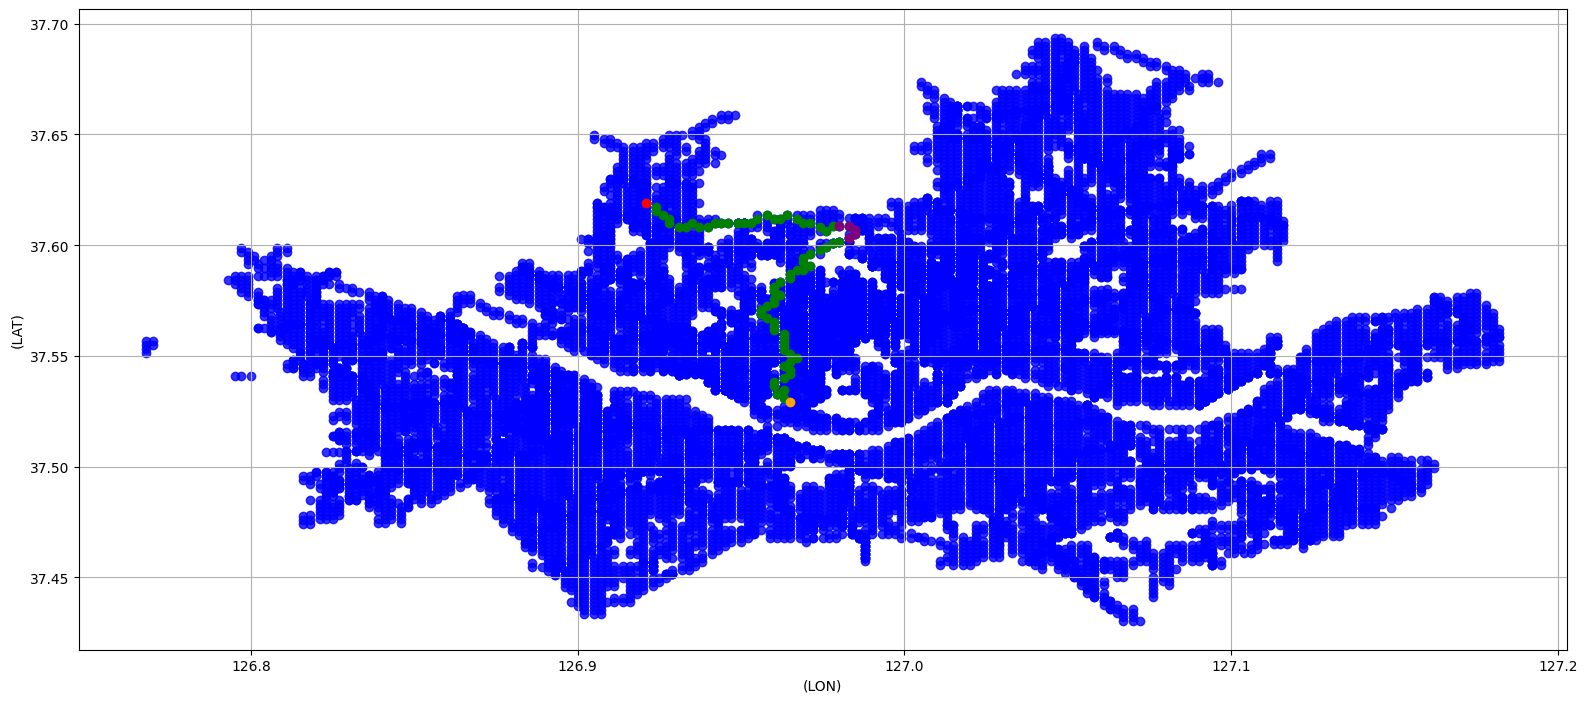

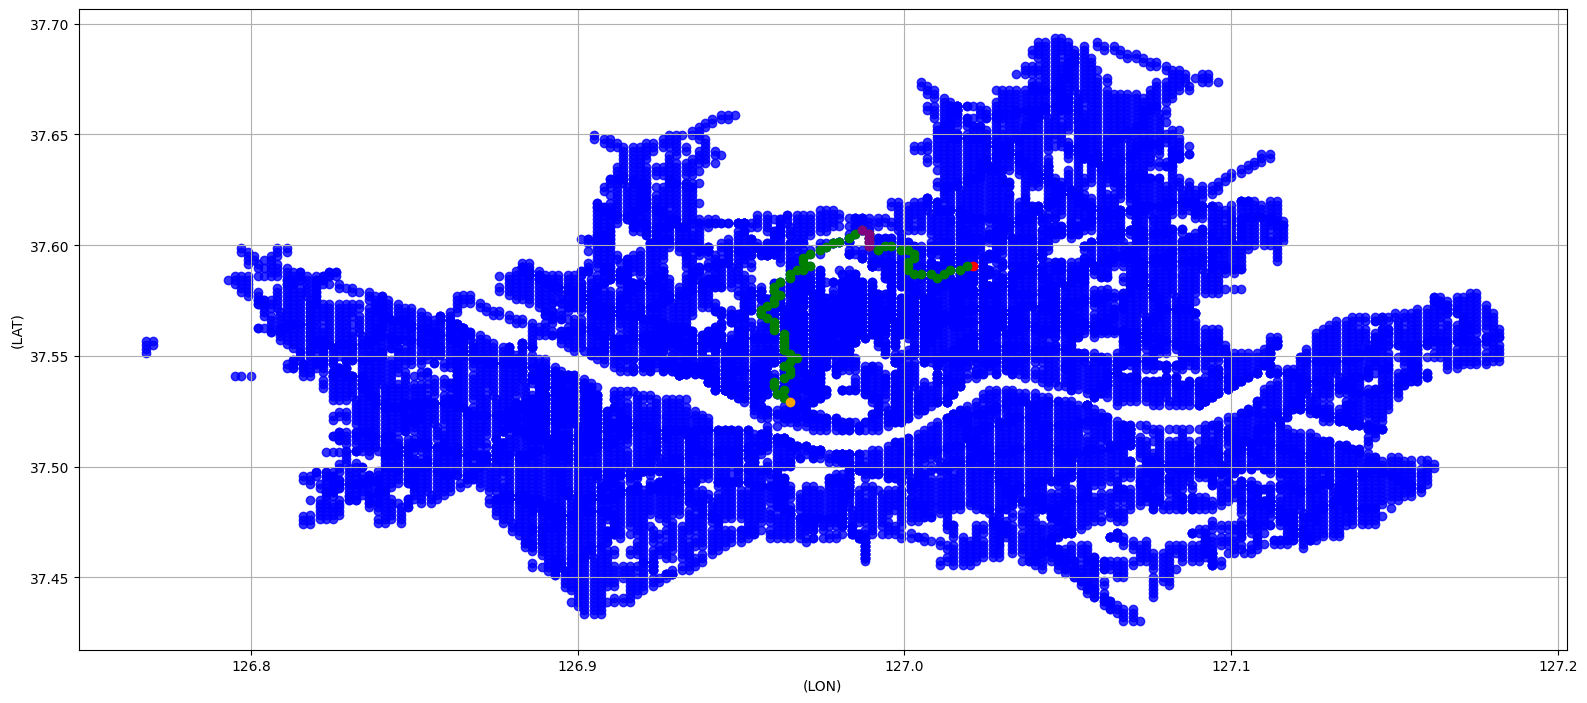

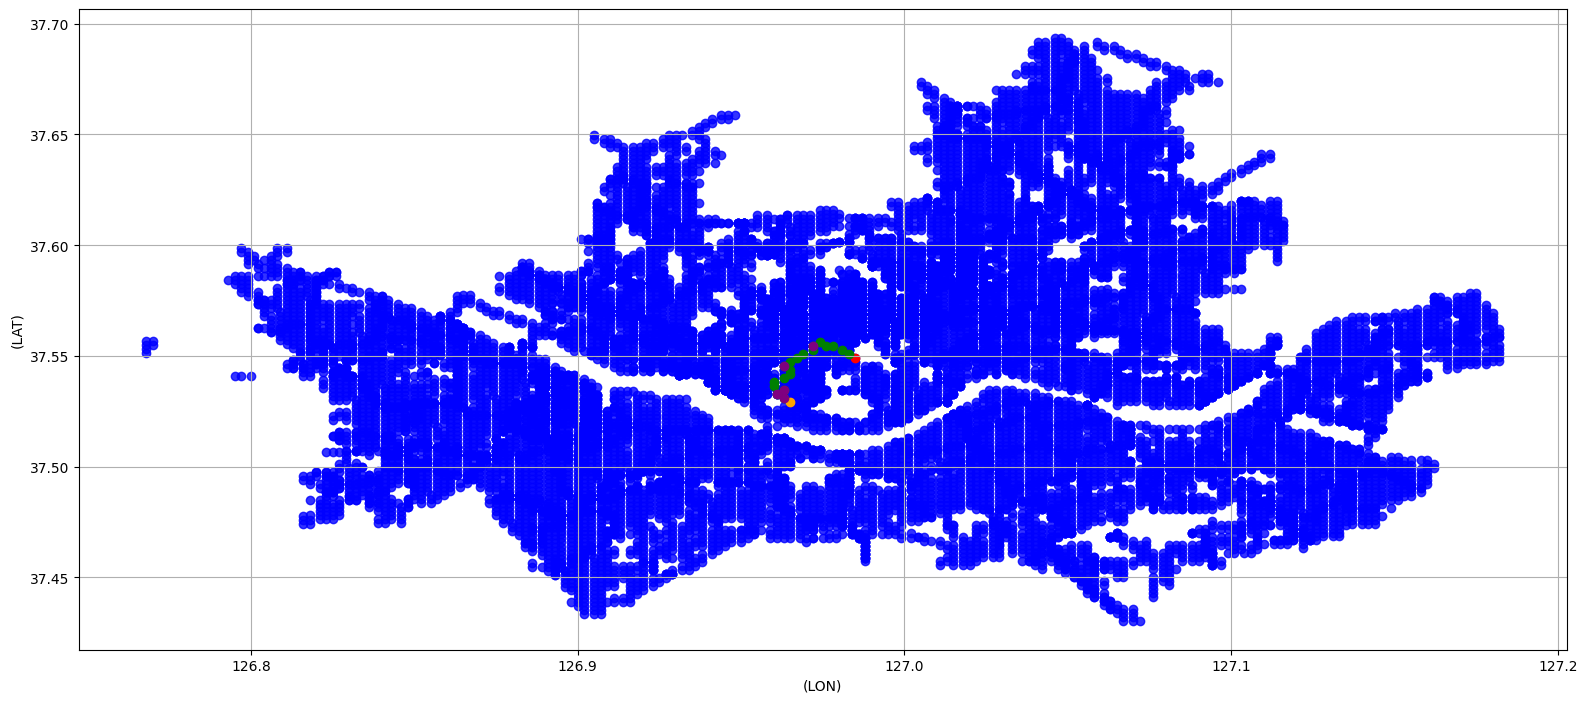

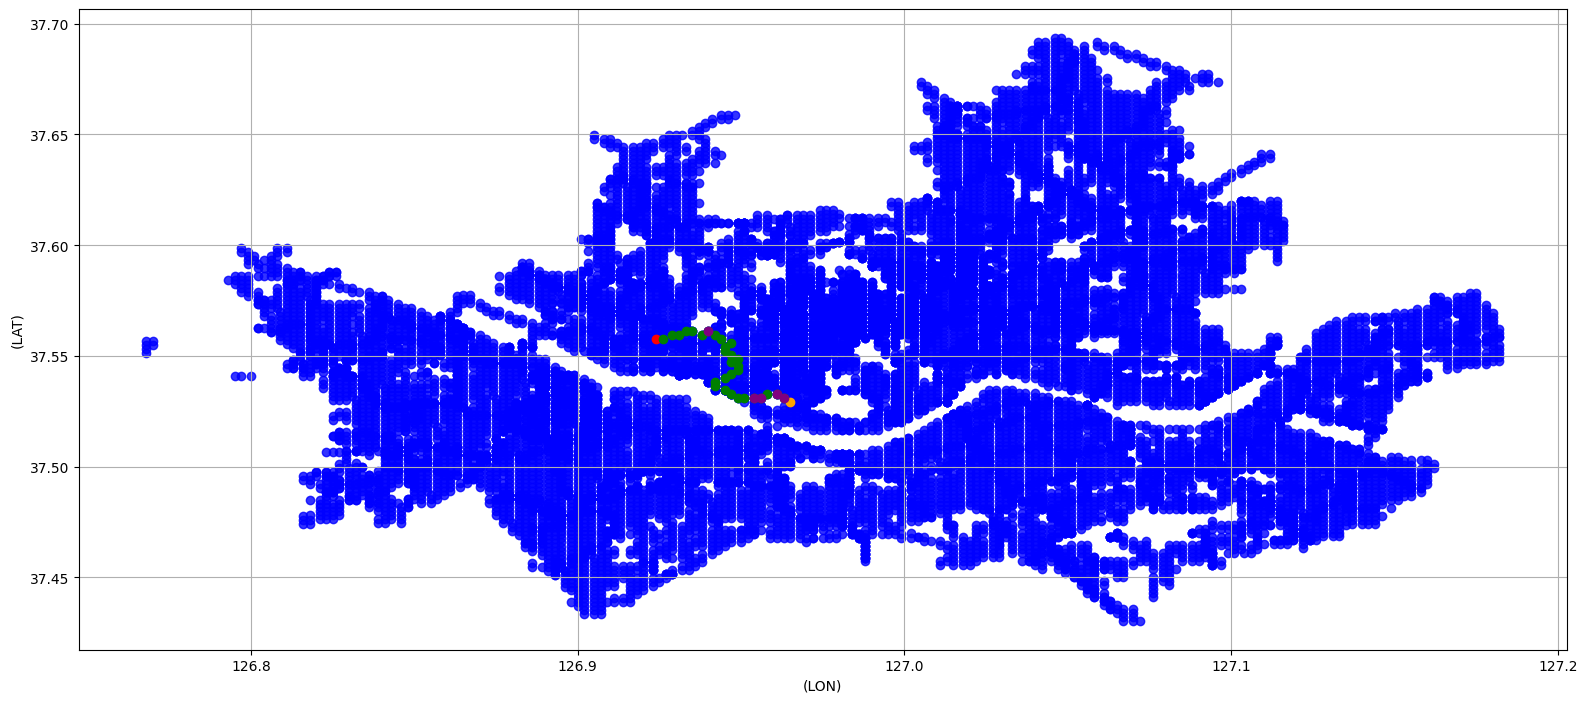

In [5]:
# Action: 순찰 경로 최적화 GUI


# GUI 생성    
root = tk.Tk()
root.title("순찰 경로 시스템")
root.geometry("800x800")

# 위젯들을 그리드에 배치하기 전에 각 행의 비율을 설정합니다.
root.grid_rowconfigure(0, weight=1)
root.grid_rowconfigure(1, weight=1)
root.grid_rowconfigure(2, weight=1)
root.grid_rowconfigure(3, weight=1)
root.grid_rowconfigure(4, weight=100)  # 그래프 프레임에 더 큰 가중치를 부여합니다.

# 열의 비율도 설정합니다.
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(1, weight=3)  # 입력 필드에 더 많은 공간을 할당합니다.

# 프레임을 그리드에 추가합니다.
frame = ttk.Frame(root)
frame.grid(row=4, column=0, columnspan=2, sticky='nsew')  # 프레임을 네 번째 행에 배치합니다.

# 출발지 라벨과 입력 필드를 그리드에 배치합니다.
departure_label = tk.Label(root, text="출발지", anchor='w')
departure_label.grid(row=0, column=0, sticky='we', padx=10, pady=5)

departure_entry = ttk.Entry(root)
departure_entry.grid(row=0, column=1, sticky='we', padx=10, pady=5)

# 도착지 라벨과 입력 필드를 그리드에 배치합니다.
destination_label = tk.Label(root, text="도착지", anchor='w')
destination_label.grid(row=1, column=0, sticky='we', padx=10, pady=5)

destination_entry = ttk.Entry(root)
destination_entry.grid(row=1, column=1, sticky='we', padx=10, pady=5)

# 검색 버튼을 그리드에 배치합니다.
search_button = ttk.Button(root, text="검색",command=update_status_and_search)  # 'embed_figure' 함수 연결 필요
search_button.grid(row=2, column=0, columnspan=2, pady=10, sticky='we')

# 상태 레이블
status_label = tk.Label(root, text="")
status_label.grid(row=3 ,column=0, columnspan=2, sticky='we', padx=10, pady=20)

# 초기 캔버스 설정을 None으로 합니다. 'embed_figure' 함수 정의가 필요합니다.
canvas = None

root.mainloop()